In [1]:
import pandas as pd

train_data = pd.read_csv('Carseats_training.csv')
test_data = pd.read_csv('Carseats_testing.csv')


In [2]:
train_data.head()

,ID,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,10.48,138,72,0,148,94,Medium,27,17,Yes,Yes
1,2,10.43,77,69,0,25,24,Medium,50,18,Yes,No
2,3,5.32,118,74,6,426,102,Medium,80,18,Yes,Yes
3,4,7.67,129,117,8,400,101,Bad,36,10,Yes,Yes
4,5,5.32,152,116,0,170,160,Medium,39,16,Yes,No


In [3]:
test_data.head()

,ID,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,107,111,14,400,103,Medium,41,11,No,Yes
1,2,147,58,7,100,191,Bad,27,15,Yes,Yes
2,3,115,89,0,38,122,Medium,25,12,Yes,No
3,4,122,76,0,270,100,Good,60,18,No,No
4,5,123,84,0,74,89,Good,59,10,Yes,No


##1A
**Binary variable encoding:** In the dataset, Urban, US are both binary variables
which take values No and Yes. Convert them to 0/1 binary variables.

In [4]:
# Defining mapping dictionary
binary_mapping = {'No': 0, 'Yes': 1}

# Applying the mapping to the "Urban" and "US" columns in both training and testing datasets
train_data['Urban'] = train_data['Urban'].map(binary_mapping)
train_data['US'] = train_data['US'].map(binary_mapping)

test_data['Urban'] = test_data['Urban'].map(binary_mapping)
test_data['US'] = test_data['US'].map(binary_mapping)


In [5]:
train_data.head()

,ID,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,10.48,138,72,0,148,94,Medium,27,17,1,1
1,2,10.43,77,69,0,25,24,Medium,50,18,1,0
2,3,5.32,118,74,6,426,102,Medium,80,18,1,1
3,4,7.67,129,117,8,400,101,Bad,36,10,1,1
4,5,5.32,152,116,0,170,160,Medium,39,16,1,0


In [6]:
test_data.head()

,ID,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,107,111,14,400,103,Medium,41,11,0,1
1,2,147,58,7,100,191,Bad,27,15,1,1
2,3,115,89,0,38,122,Medium,25,12,1,0
3,4,122,76,0,270,100,Good,60,18,0,0
4,5,123,84,0,74,89,Good,59,10,1,0


##1B
**Categorical variable encoding:** ShelveLoc is a categorical variable that takes
three values, namely Bad, Good, Medium. Perform one-hot encoding for this
particular variable. Create three dummy variables: ShelveLocBad,
ShelveLocGood, ShelveLocMedium. ShelveLocBad should be 1 when the value
of ShelveLoc is Bad and 0 otherwise. ShelveLocGood, ShelveLocMedium should
be encoded in a similar way. This means that for any datapoint, exactly one of
ShelveLocBad, ShelveLocGood, ShelveLocMedium will take the value 1 and the
other two will be 0.


In [7]:
train_data = pd.get_dummies(train_data, columns=["ShelveLoc"], prefix=["ShelveLoc"], drop_first=False)
test_data = pd.get_dummies(test_data, columns=["ShelveLoc"], prefix=["ShelveLoc"], drop_first=False)


In [8]:
train_data.head()

,ID,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,1,10.48,138,72,0,148,94,27,17,1,1,0,0,1
1,2,10.43,77,69,0,25,24,50,18,1,0,0,0,1
2,3,5.32,118,74,6,426,102,80,18,1,1,0,0,1
3,4,7.67,129,117,8,400,101,36,10,1,1,1,0,0
4,5,5.32,152,116,0,170,160,39,16,1,0,0,0,1


In [9]:
test_data.head()

,ID,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,1,107,111,14,400,103,41,11,0,1,0,0,1
1,2,147,58,7,100,191,27,15,1,1,1,0,0
2,3,115,89,0,38,122,25,12,1,0,0,0,1
3,4,122,76,0,270,100,60,18,0,0,0,1,0
4,5,123,84,0,74,89,59,10,1,0,0,1,0


##1C
**Feature standardization:** Feature standardization makes the data such that it
has zero mean and unit variance. For every continuous covariate, you must
subtract the mean and divide it by the variance.

```NOTE: You must do the feature standardization for the test set using the mean and variance calculated from the train set.```


In [10]:
# List of continuous covariates
continuous_covariates = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']

# Calculate mean and variance for each continuous covariate in the training dataset
mean_values = train_data[continuous_covariates].mean()
variance_values = train_data[continuous_covariates].var()

# Standardize the training dataset
train_data[continuous_covariates] = (train_data[continuous_covariates] - mean_values) / variance_values

# Using same mean and variance values to standardize the test dataset
test_data[continuous_covariates] = (test_data[continuous_covariates] - mean_values) / variance_values


In [11]:
train_data.head()

,ID,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,1,10.48,0.052690,0.004886,-0.149909,-0.005317,-0.037854,-0.104122,0.423106,1,1,0,0,1
1,2,10.43,-0.196102,0.001060,-0.149909,-0.010928,-0.164055,-0.014439,0.562257,1,0,0,0,1
2,3,5.32,-0.028881,0.007437,-0.015411,0.007365,-0.023432,0.102538,0.562257,1,1,0,0,1
3,4,7.67,0.015983,0.062277,0.029421,0.006179,-0.025234,-0.069029,-0.550951,1,1,1,0,0
4,5,5.32,0.109790,0.061001,-0.149909,-0.004313,0.081134,-0.057331,0.283955,1,0,0,0,1


In [12]:
test_data.head()

,ID,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,1,-0.073745,0.054625,0.163919,0.006179,-0.021629,-0.049533,-0.411800,0,1,0,0,1
1,2,0.089397,-0.012969,0.007005,-0.007507,0.137023,-0.104122,0.144804,1,1,1,0,0
2,3,-0.041117,0.026567,-0.149909,-0.010335,0.012626,-0.111920,-0.272649,1,0,0,0,1
3,4,-0.012567,0.009988,-0.149909,0.000249,-0.027037,0.024553,0.562257,0,0,0,1,0
4,5,-0.008489,0.020190,-0.149909,-0.008693,-0.046869,0.020654,-0.550951,1,0,0,1,0


#Part2

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Extract features and target variable
X_train = train_data.drop(columns=["Sales", "ID"]).values
y_train = train_data["Sales"].values
X_test = test_data.drop(columns=["ID"]).values


In [14]:
# Define functions for loss, gradients, and regularization
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def compute_gradients(X, y, w, b, l2_reg=0.0, l1_reg=0.0):
    m = len(X)
    y_pred = np.dot(X, w) + b
    error = y - y_pred

    # Compute gradients with L2 and L1 regularization
    grad_w = (-2/m) * np.dot(X.T, error) + (2 * l2_reg * w) + l1_reg * np.sign(w)
    grad_b = (-2/m) * np.sum(error)

    return grad_w, grad_b

def stochastic_gradient_descent(X, y, learning_rate, epochs, l2_reg=0.0, l1_reg=0.0):
    m, n = X.shape
    w = np.zeros(n)
    b = 0.0
    losses = []

    for epoch in range(epochs):
        for i in range(m):
            xi = X[i:i+1]  # Reshape X to be a 2D array for a single data point
            yi = y[i:i+1]
            grad_w, grad_b = compute_gradients(xi, yi, w, b, l2_reg, l1_reg)
            w -= learning_rate * grad_w
            b -= learning_rate * grad_b

            if i % 10 == 0:
                y_pred = np.dot(X, w) + b
                loss = mean_squared_error(y, y_pred)
                losses.append(loss)

    return w, b, losses



Training and Testing

Test Loss for No Regularization (η=0.01): 2.88430


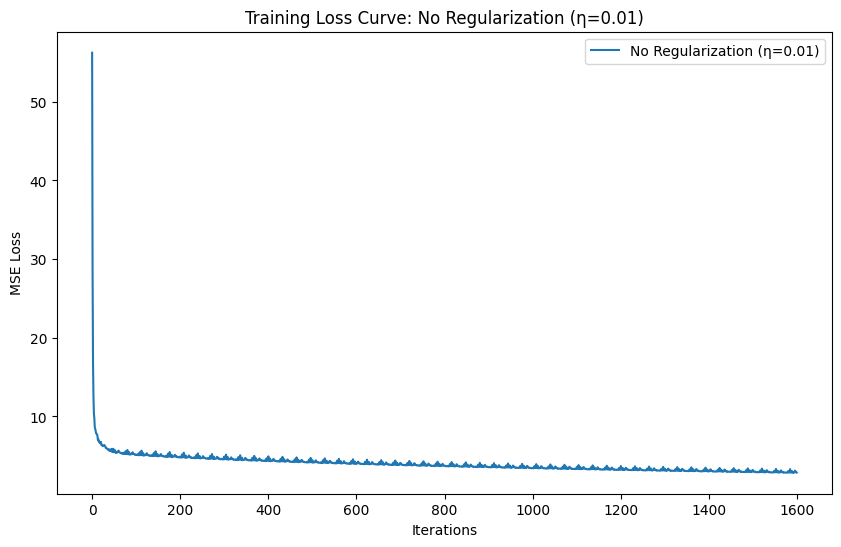

Test Loss for No Regularization (η=0.001): 4.90841


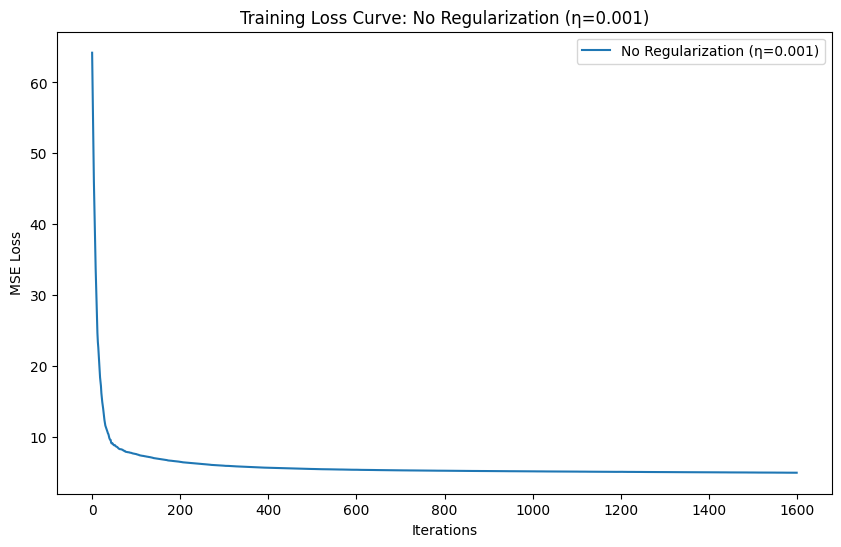

Test Loss for L2 Regularization (η=0.001, λ=0.1): 5.44559


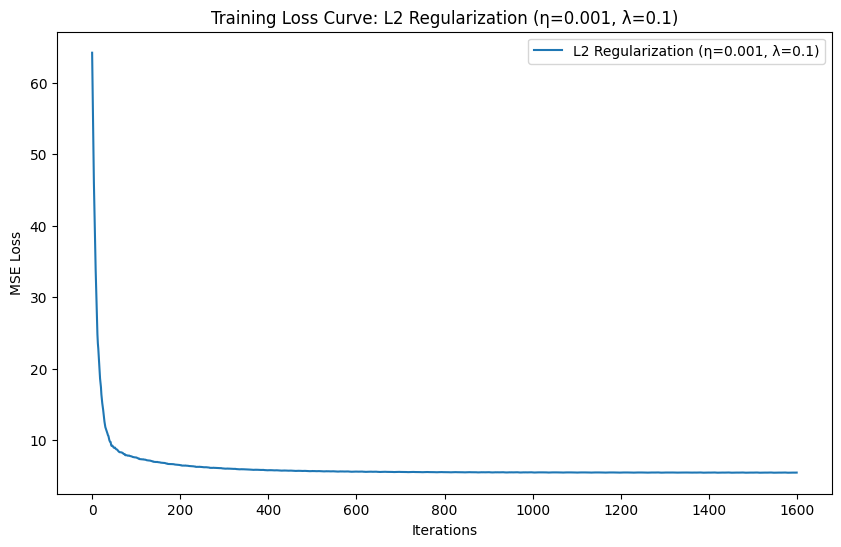

Test Loss for L1 Regularization (η=0.001, λ=0.1): 5.36450


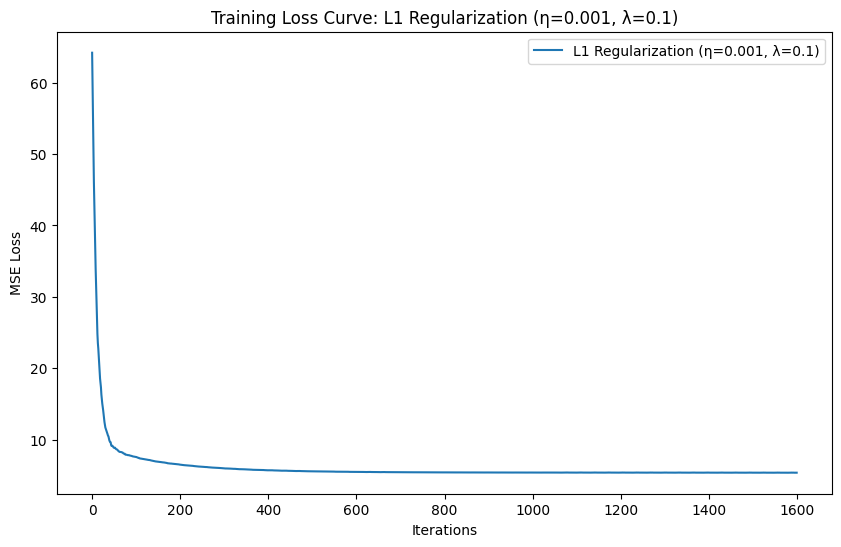

Test Loss for No Regularization (η=0.01): 2.88430
Test Loss for No Regularization (η=0.001): 4.90841
Test Loss for L2 Regularization (η=0.001, λ=0.1): 5.44559
Test Loss for L1 Regularization (η=0.001, λ=0.1): 5.36450


In [15]:
# Define training configurations
training_configurations = [
    {"name": "No Regularization (η=0.01)", "eta": 0.01},
    {"name": "No Regularization (η=0.001)", "eta": 0.001},
    {"name": "L2 Regularization (η=0.001, λ=0.1)", "eta": 0.001, "lambda_l2": 0.1},
    {"name": "L1 Regularization (η=0.001, λ=0.1)", "eta": 0.001, "lambda_l1": 0.1},
]

epochs = 50

# Create a list to store test losses
test_losses = []

for config in training_configurations:
    name = config["name"]
    eta = config["eta"]
    lambda_l2 = config.get("lambda_l2", 0.0)
    lambda_l1 = config.get("lambda_l1", 0.0)

    # Create a new plot for each configuration
    plt.figure(figsize=(10, 6))

    # Train the model
    w, b, losses = stochastic_gradient_descent(X_train, y_train, eta, epochs, l2_reg=lambda_l2, l1_reg=lambda_l1)

    # Plot loss curve for this configuration
    plt.plot(range(len(losses)), losses, label=name)
    plt.xlabel("Iterations")
    plt.ylabel("MSE Loss")
    plt.legend()
    plt.title("Training Loss Curve: "+ name)
    

    # Evaluate the model on the "test" set (using the training data for this example)
    y_pred = np.dot(X_train, w) + b
    test_loss = mean_squared_error(y_train, y_pred)
    test_losses.append((name, test_loss))
    print("Test Loss for {}: {:.5f}".format(name, test_loss))

    # plot the curve
    plt.show()

# Print test losses for all configurations
for name, test_loss in test_losses:
    print("Test Loss for {}: {:.5f}".format(name, test_loss))